In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
os.getcwd()

'/Users/Abhimika'

In [5]:
os.chdir('/Users/Abhimika/Desktop/AI and Data Science/Data_Science_Python/Project')

In [6]:
wal_data = pd.read_csv("Walmart_Store_sales.csv")

In [7]:
# General Analysis of Data 
wal_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
wal_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
wal_data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

In [10]:
wal_data.shape

(6435, 8)

In [11]:
wal_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [12]:
wal_data.isnull().values.any()

False

In [13]:
# 1. Which store has maximum sales

df = pd.DataFrame(wal_data.groupby(["Store"]).sum().sort_values("Weekly_Sales",ascending=False).head(1))
df['Weekly_Sales']

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

In [14]:
# 1. Which store has maximum weekly sales. (Additional)

mx = wal_data['Weekly_Sales'].max()
wal_data.loc[wal_data['Weekly_Sales'] == mx, ['Store']]

,Store
1905,14


In [15]:
# 2. Which store has maximum standard deviation i.e., the sales vary a lot. 
# Also, find out the coefficient of mean to standard deviation

# Solution : Store 14 has maximum Standard deviation 
wal_data.groupby(['Store']).std().sort_values('Weekly_Sales',ascending=False).head(1).iloc[:,0]

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [16]:
# Also, find out the coefficient of mean to standard deviation

wal_cof = wal_data.groupby(['Store']).std().iloc[:,0]/wal_data.groupby(['Store']).mean().iloc[:,0]
wal_cof

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [17]:
# 3. Which store/s has good quarterly growth rate in Q3’2012

# Approach : 
# a) First taking only the date column and creating a new table with only 2012 data 

In [18]:
week_dt = wal_data.iloc[:,1]
sr = pd.to_datetime(week_dt)

In [19]:
dt_wal = pd.DataFrame(wal_data.loc[sr.dt.year == 2012])

In [20]:
dt_wal['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
dt_wal['Quarter'] = sr.dt.quarter

In [22]:
# b) Creating two new dataframe with only Q2 and Q3 data 
quat2 = pd.DataFrame(dt_wal[dt_wal['Quarter'] == 2])
quat3 = pd.DataFrame(dt_wal[dt_wal['Quarter'] == 3])

In [23]:
# c) SUm of total sales for each store of Q2 and Q3 
sales_q2 = quat2.groupby(['Store']).sum().iloc[:,0:1]
sales_q3 = quat3.groupby(['Store']).sum().iloc[:,0:1]

In [24]:
# d) Formula to get Growth over quarters
Q3_growth = ((sales_q3 - sales_q2)/sales_q2)*100
# All the stores has -ve sales when compare to Q2, so now checking Stores which has growth more than -5% 
Q3_growth.loc[:,'Weekly_Sales'] > -5

Store
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35     True
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
Name: Weekly_Sales, dtype: bool

In [25]:
# Findings : None of the stores are showing positive growth in Q3 when comparing with Q2. 
# Possible reason could be the number of days for Q2(585) and Q3(540)
quat3.count()

Store           540
Date            540
Weekly_Sales    540
Holiday_Flag    540
Temperature     540
Fuel_Price      540
CPI             540
Unemployment    540
Quarter         540
dtype: int64

In [26]:
quat2.count()

Store           585
Date            585
Weekly_Sales    585
Holiday_Flag    585
Temperature     585
Fuel_Price      585
CPI             585
Unemployment    585
Quarter         585
dtype: int64

In [27]:
quat2.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,585.000000,5.850000e+02,585.0,585.000000,585.000000,585.000000,585.000000,585.0
mean,23.000000,1.055067e+06,0.0,66.451863,3.753173,175.531999,7.376516,2.0
std,12.998288,5.476448e+05,0.0,14.639302,0.286851,40.664388,1.702572,0.0
min,1.000000,2.443383e+05,0.0,18.670000,3.080000,130.157516,3.879000,2.0
25%,12.000000,5.700458e+05,0.0,56.670000,3.577000,136.698129,6.235000,2.0
50%,23.000000,9.823455e+05,0.0,68.840000,3.804000,190.813801,7.139000,2.0
75%,34.000000,1.458059e+06,0.0,77.530000,3.966000,220.488647,8.253000,2.0
max,45.000000,2.565260e+06,0.0,98.150000,4.308000,226.966233,12.187000,2.0


In [28]:
quat3.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,540.000000,5.400000e+02,540.000000,540.000000,540.000000,540.000000,540.000000,540.0
mean,23.000000,1.029620e+06,0.083333,72.823037,3.725611,175.825518,7.275100,3.0
std,12.999215,5.284940e+05,0.276642,12.327262,0.228122,40.854238,1.676822,0.0
min,1.000000,2.371298e+05,0.000000,28.160000,3.224000,130.683000,4.077000,3.0
25%,12.000000,5.540454e+05,0.000000,65.102500,3.582000,137.506690,6.334000,3.0
50%,23.000000,9.603944e+05,0.000000,75.355000,3.717000,191.166305,7.147000,3.0
75%,34.000000,1.422381e+06,0.000000,81.760000,3.884000,221.260121,8.239000,3.0
max,45.000000,2.283540e+06,1.000000,97.600000,4.250000,226.763073,12.187000,3.0


In [29]:
##########################################################################################

In [30]:
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

# Data for all holidays 
holiday = wal_data[wal_data['Holiday_Flag'] == 1]

In [31]:
# Taking out mean for each holidays 
holiday_sales = holiday.groupby(['Date']).mean().sort_values('Weekly_Sales',ascending=False)

In [32]:
# Checking data 
holiday_sales['Weekly_Sales']

Date
25-11-2011    1.479858e+06
26-11-2010    1.462689e+06
10-02-2012    1.111320e+06
12-02-2010    1.074148e+06
07-09-2012    1.074001e+06
11-02-2011    1.051915e+06
09-09-2011    1.039183e+06
30-12-2011    1.023166e+06
10-09-2010    1.014098e+06
31-12-2010    8.985004e+05
Name: Weekly_Sales, dtype: float64

In [33]:
# Data for all non holidays 
non_holiday = wal_data[wal_data['Holiday_Flag'] == 0]

In [34]:
# Comparing Mean for Holidays which is higher than non holidays 
non_holiday['Weekly_Sales'].mean() < holiday_sales['Weekly_Sales']

Date
25-11-2011     True
26-11-2010     True
10-02-2012     True
12-02-2010     True
07-09-2012     True
11-02-2011     True
09-09-2011    False
30-12-2011    False
10-09-2010    False
31-12-2010    False
Name: Weekly_Sales, dtype: bool

In [35]:
#################################################################

In [36]:
# 4. Provide a monthly and semester view of sales in units and give insights
# Converting 'Date' column from object to datetime 
#df['user_created_at_year_month'] = df['user_created_at'].dt.strftime('%Y-%m')
#wal_data['Create_Date'] = wal_data['Date'].dt.strftime('%Y-%m')
wal_data['Date'] = pd.to_datetime(wal_data['Date'])

In [37]:
# Created a column with Month-Year value 
wal_data['Create_Date'] = wal_data['Date'].dt.strftime('%Y-%m')

In [38]:
wal_data.groupby(['Create_Date'])['Weekly_Sales'].sum().sort_values()

Create_Date
2010-01    4.223988e+07
2012-12    4.612851e+07
2012-11    4.692588e+07
2011-03    1.365205e+08
2011-06    1.401936e+08
2012-05    1.422830e+08
2010-06    1.424361e+08
2012-02    1.428296e+08
2010-11    1.587731e+08
2012-01    1.722207e+08
2010-09    1.797041e+08
2012-09    1.797959e+08
2012-04    1.825428e+08
2011-05    1.828017e+08
2011-10    1.837193e+08
2010-04    1.838118e+08
2010-07    1.842664e+08
2010-08    1.845381e+08
2012-07    1.845865e+08
2010-03    1.862262e+08
2011-02    1.876092e+08
2012-10    1.880794e+08
2011-08    1.880810e+08
2010-02    1.915869e+08
2012-08    1.916126e+08
2011-01    2.119657e+08
2011-07    2.244611e+08
2011-12    2.293760e+08
2012-03    2.307397e+08
2011-09    2.310323e+08
2010-10    2.311201e+08
2011-11    2.534703e+08
2011-04    2.789693e+08
2010-05    2.806119e+08
2012-06    2.923883e+08
2010-12    3.235716e+08
Name: Weekly_Sales, dtype: float64

In [39]:
wal_data['Date_Year'] = wal_data['Date'].dt.strftime('%Y')

In [40]:
wal_data['Date_Month'] = wal_data['Date'].dt.strftime('%m').astype(int)

In [41]:
wal_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Create_Date,Date_Year,Date_Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,2010,5


In [42]:
import seaborn as sns

In [43]:
dt_grp = wal_data.pivot_table(values='Weekly_Sales',index='Date_Month',columns='Date_Year')

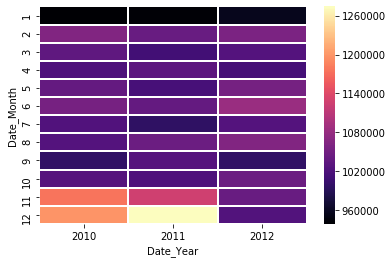

In [44]:
# Heatmap represent sales for each month
sns.heatmap(dt_grp,cmap='magma',linecolor='white',linewidth=1)

In [45]:
wal_data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Create_Date,Date_Year,Date_Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,2010,5


In [ ]:
# semester view of sales in units and give insights
data = wal_data.copy()

In [253]:
# Function to derive new column with Year and semester concatenated 
# First deriving to get semester for each year 
def sem_def():
    for i in range(data['Date_Month'].count()):
        if (data['Date_Month'][i]) > 6:
            sem = data['Date_Year'][i] + '-sem2'
        elif (data['Date_Month'][i]) < 7: 
            sem = data['Date_Year'][i]  + '-sem1'
        data.loc[i,'Half_Year'] = sem

In [254]:
sem_def()

In [255]:
data.groupby(['Half_Year']).sum().sort_values('Weekly_Sales',ascending=False)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_Month
Half_Year,,,,,,,,
2011-sem2,27945,1.310140e+09,180,74032.24,4294.118,209188.633710,9724.171,11475
2010-sem2,26910,1.261973e+09,180,71710.57,3317.596,196837.429836,9911.057,11295
2012-sem1,25875,1.163004e+09,0,66795.37,4150.864,197133.112758,8353.571,4140
2011-sem1,25875,1.138060e+09,0,63556.32,4040.763,192228.341675,9187.793,3780
2010-sem1,22770,1.026913e+09,0,58466.06,2781.741,166262.418232,8433.206,3825
2012-sem2,18630,8.371288e+08,90,55810.88,3027.553,142457.028206,5864.739,7155


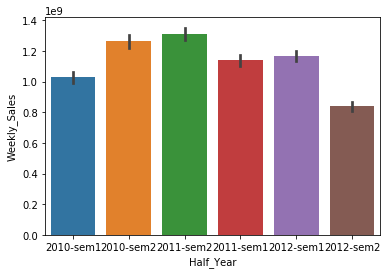

In [256]:
from numpy import sum
sns.barplot(x=data['Half_Year'], y = data['Weekly_Sales'], data=data,estimator=sum)

In [ ]:
########################################
# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
# (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on 
# sales.

In [408]:
#wal_data.sort_values(by='Date')
lr_dt = pd.read_csv("Walmart_Store_sales.csv")

In [409]:
lr_dt.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [410]:
# restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)
lr_dt['Date_Rank'] = lr_dt['Date'].rank(method='dense').astype(int)

In [411]:
lr_dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_Rank
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,20
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,53
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,86
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,119
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,21


In [412]:
x = lr_dt.iloc[:,5:8]
y = lr_dt['Weekly_Sales']

In [413]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [414]:
linReg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [415]:
print('The estimated intercept is %.2f '%linReg.intercept_)

The estimated intercept is 1745656.71 


In [416]:
print('The estimated coefficient is %d '%len(linReg.coef_))

The estimated coefficient is 3 


In [417]:
from sklearn.model_selection import train_test_split

In [418]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [419]:
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [420]:
print('MSE value is: %.2f ' %np.mean(linReg.predict(x_test)-y_test) ** 2)

MSE value is: 19825784.22 


In [421]:
print('Variance Score is: %.3f ' %linReg.score(x_test,y_test))

Variance Score is: 0.021 


In [422]:
y_predicted = linReg.predict(x_test)

In [423]:
y_predicted

array([ 856522.24133566,  986432.05364859, 1234595.89046646, ...,
       1024330.96018397, 1002516.39070726,  995056.69258899])

In [424]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_predicted)

311846898095.0194

In [425]:
print('R-square score is: %.4f' %r2_score(y_test, y_predicted))

R-square score is: 0.0213


In [433]:
# Change dates into days by creating new variable.
from datetime import datetime
import calendar

In [435]:
for i in range(lr_dt['Date'].count()):    
    day = datetime.strptime(lr_dt['Date'][i],"%d-%m-%Y")
    print(day.day)

5
12
19
26
5
12
19
26
2
9
16
23
30
7
14
21
28
4
11
18
25
2
9
16
23
30
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
3
10
17
24
31
7
14
21
28
4
11
18
25
4
11
18
25
1
8
15
22
29
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
2
9
16
23
30
7
14
21
28
4
11
18
25
2
9
16
23
30
6
13
20
27
3
10
17
24
2
9
16
23
30
6
13
20
27
4
11
18
25
1
8
15
22
29
6
13
20
27
3
10
17
24
31
7
14
21
28
5
12
19
26
5
12
19
26
5
12
19
26
2
9
16
23
30
7
14
21
28
4
11
18
25
2
9
16
23
30
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
3
10
17
24
31
7
14
21
28
4
11
18
25
4
11
18
25
1
8
15
22
29
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
2
9
16
23
30
7
14
21
28
4
11
18
25
2
9
16
23
30
6
13
20
27
3
10
17
24
2
9
16
23
30
6
13
20
27
4
11
18
25
1
8
15
22
29
6
13
20
27
3
10
17
24
31
7
14
21
28
5
12
19
26
5
12
19
26
5
12
19
26
2
9
16
23
30
7
14
21
28
4
11
18
25
2
9
16
23
30
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
3
10
17
24
31
7
14
21
28
4
11
18
25
4
11
18
25
1
8
15
22
29
6
13
20
27
3
10
17
24
1
8
15
22
29
5
12
19
26
2
9
